![](files/images/EscUpmPolit_p.gif "UPM")

## Imports

In [1]:
import pandas as pd
import csv
import numpy as np
import pickle
from pandas.plotting import scatter_matrix
from scipy.stats import norm, skew
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

## Reading data

In [2]:
dtype_list=pickle.load(open('type/train.pkl','rb'))
df=pd.read_csv('dataset/train_data_balance_todos.csv',dtype=dtype_list,nrows=1000000)
df_original=df.copy()

In [3]:
pd.set_option('display.max_columns', None)
df

,label,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,app_first_class,app_second_class,age,city,city_rank,device_name,device_size,career,gender,net_type,residence,his_app_size,his_on_shelf_time,app_score,emui_dev,list_time,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_onlinerate,communication_avgonline_30d,indu_name,pt_d
0,0,1486116,1993,5405,7,207,17,5,12,13,37,4,21,5,-50,3,87,117,8,2,2,41,4,3,2,28,5,4,20,1,-1,2,1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^1...,12,17,7
1,1,1973268,1817,2242,3,210,70,4,17,88,40,4,25,5,-71,4,16,141,4,2,3,15,16,3,2,27,4,5,20,-1,-1,6,21^22^23,5,27,3
2,1,2045003,4400,2476,7,183,29,5,21,86,37,4,21,4,-97,3,46,141,9,2,2,42,4,3,2,14,10,3,18,-1,-1,2,1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^1...,12,17,1
3,0,1538596,3420,4680,8,142,36,5,12,80,41,4,26,7,-7,3,80,156,9,2,2,19,5,3,2,14,7,1,18,-1,-1,2,6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,11,42,3
4,0,1879741,2229,5483,7,156,56,5,12,58,37,4,21,7,-75,5,80,156,4,2,2,28,14,3,2,14,7,1,18,-1,-1,2,5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^...,11,17,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,1278096,1731,5964,7,142,36,5,17,80,41,4,26,1,-93,4,104,141,4,4,2,12,5,3,2,27,14,5,-1,-1,-1,2,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,13,42,1
999996,1,2090107,2377,6556,7,133,37,5,11,34,13,4,25,7,-35,5,104,141,9,2,2,12,17,3,2,20,14,5,12,-1,-1,2,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,13,17,5
999997,0,1549264,5871,2458,6,107,15,5,18,46,39,4,17,7,-49,5,58,141,9,2,2,32,6,3,2,20,7,2,20,-1,-1,2,7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,10,36,2
999998,1,1570045,2991,4835,6,132,60,3,17,78,23,2,23,4,-25,5,45,141,4,2,3,20,-1,-1,1,20,8,5,20,-1,-1,2,6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,11,47,2


In [4]:
df.shape

(1000000, 36)

## Features Study

## Hacer dummies y ver relación entre variables

In [5]:
c_drop = ['uid', 'task_id', 'adv_id','age', 'net_type', 'device_size', 'emui_dev', 'list_time', 'device_price', 'app_score','consume_purchase', 'communication_avgonline_30d', 'pt_d', 'slot_id','app_first_class', 'app_second_class']

#df.drop(['membership_life_duration','up_membership_grade','up_life_duration','his_on_shelf_time','his_app_size'],axis=1,inplace=True)
df.drop(c_drop,axis=1,inplace=True)

In [6]:
df

,label,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,spread_app_id,tags,city,city_rank,device_name,career,gender,residence,his_app_size,his_on_shelf_time,up_life_duration,up_membership_grade,membership_life_duration,indu_name
0,0,7,207,17,5,13,37,-50,3,87,8,2,41,4,3,20,1,-1,17
1,1,3,210,70,4,88,40,-71,4,16,4,2,15,16,3,20,-1,-1,27
2,1,7,183,29,5,86,37,-97,3,46,9,2,42,4,3,18,-1,-1,17
3,0,8,142,36,5,80,41,-7,3,80,9,2,19,5,3,18,-1,-1,42
4,0,7,156,56,5,58,37,-75,5,80,4,2,28,14,3,18,-1,-1,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890971,0,6,178,17,5,70,39,-128,3,92,9,2,45,2,3,20,-1,-1,36
2890972,1,7,130,30,4,28,39,34,4,99,4,2,45,6,2,-1,-1,-1,36
2890973,0,7,186,33,5,85,19,-93,4,46,9,2,46,13,3,20,-1,-1,13
2890974,0,3,155,39,5,59,41,-93,4,32,4,2,46,14,2,20,-1,-1,26


In [7]:
df.columns

Index(['label', 'creat_type_cd', 'adv_prim_id', 'dev_id', 'inter_type_cd',
       'spread_app_id', 'tags', 'city', 'city_rank', 'device_name', 'career',
       'gender', 'residence', 'his_app_size', 'his_on_shelf_time',
       'up_life_duration', 'up_membership_grade', 'membership_life_duration',
       'indu_name'],
      dtype='object')

In [24]:
c = ['creat_type_cd', 'adv_prim_id', 'dev_id', 'inter_type_cd',
       'spread_app_id', 'tags', 'city', 'city_rank', 'device_name', 'career',
       'gender', 'residence', 'his_app_size', 'his_on_shelf_time',
       'up_life_duration', 'up_membership_grade', 'membership_life_duration',
       'indu_name']

df1 = df.iloc[:100000, :]
df1 = pd.get_dummies(df1, columns=c)
df1[]

,label,creat_type_cd_2,creat_type_cd_3,creat_type_cd_4,creat_type_cd_5,creat_type_cd_6,creat_type_cd_7,creat_type_cd_8,creat_type_cd_9,adv_prim_id_101,adv_prim_id_102,adv_prim_id_103,adv_prim_id_104,adv_prim_id_105,adv_prim_id_106,adv_prim_id_107,adv_prim_id_108,adv_prim_id_109,adv_prim_id_110,adv_prim_id_111,adv_prim_id_112,adv_prim_id_113,adv_prim_id_114,adv_prim_id_115,adv_prim_id_117,adv_prim_id_118,adv_prim_id_119,adv_prim_id_120,adv_prim_id_122,adv_prim_id_123,adv_prim_id_124,adv_prim_id_125,adv_prim_id_126,adv_prim_id_127,adv_prim_id_128,adv_prim_id_129,adv_prim_id_130,adv_prim_id_131,adv_prim_id_132,adv_prim_id_133,adv_prim_id_134,adv_prim_id_135,adv_prim_id_137,adv_prim_id_138,adv_prim_id_139,adv_prim_id_140,adv_prim_id_141,adv_prim_id_142,adv_prim_id_143,adv_prim_id_144,adv_prim_id_145,adv_prim_id_147,adv_prim_id_148,adv_prim_id_149,adv_prim_id_150,adv_prim_id_151,adv_prim_id_152,adv_prim_id_153,adv_prim_id_154,adv_prim_id_155,adv_prim_id_156,adv_prim_id_158,adv_prim_id_159,adv_prim_id_160,adv_prim_id_161,adv_prim_id_163,adv_prim_id_164,adv_prim_id_165,adv_prim_id_166,adv_prim_id_167,adv_prim_id_168,adv_prim_id_169,adv_prim_id_170,adv_prim_id_171,adv_prim_id_172,adv_prim_id_173,adv_prim_id_174,adv_prim_id_175,adv_prim_id_177,adv_prim_id_178,adv_prim_id_179,adv_prim_id_180,adv_prim_id_181,adv_prim_id_182,adv_prim_id_183,adv_prim_id_184,adv_prim_id_185,adv_prim_id_186,adv_prim_id_187,adv_prim_id_189,adv_prim_id_191,adv_prim_id_193,adv_prim_id_194,adv_prim_id_197,adv_prim_id_198,adv_prim_id_199,adv_prim_id_201,adv_prim_id_202,adv_prim_id_203,adv_prim_id_204,adv_prim_id_205,adv_prim_id_206,adv_prim_id_207,adv_prim_id_208,adv_prim_id_209,adv_prim_id_210,adv_prim_id_212,adv_prim_id_213,adv_prim_id_214,dev_id_11,dev_id_12,dev_id_13,dev_id_14,dev_id_15,dev_id_16,dev_id_17,dev_id_18,dev_id_19,dev_id_20,dev_id_22,dev_id_23,dev_id_24,dev_id_26,dev_id_27,dev_id_29,dev_id_30,dev_id_32,dev_id_33,dev_id_34,dev_id_35,dev_id_36,dev_id_37,dev_id_38,dev_id_39,dev_id_40,dev_id_41,dev_id_42,dev_id_43,dev_id_46,dev_id_47,dev_id_48,dev_id_50,dev_id_51,dev_id_52,dev_id_53,dev_id_54,dev_id_55,dev_id_56,dev_id_57,dev_id_58,dev_id_59,dev_id_60,dev_id_61,dev_id_62,dev_id_63,dev_id_64,dev_id_65,dev_id_67,dev_id_68,dev_id_69,dev_id_70,dev_id_71,dev_id_72,inter_type_cd_2,inter_type_cd_3,inter_type_cd_4,inter_type_cd_5,spread_app_id_11,spread_app_id_12,spread_app_id_13,spread_app_id_14,spread_app_id_15,spread_app_id_16,spread_app_id_18,spread_app_id_19,spread_app_id_20,spread_app_id_21,spread_app_id_22,spread_app_id_23,spread_app_id_24,spread_app_id_25,spread_app_id_26,spread_app_id_27,spread_app_id_28,spread_app_id_29,spread_app_id_31,spread_app_id_32,spread_app_id_33,spread_app_id_34,spread_app_id_35,spread_app_id_37,spread_app_id_38,spread_app_id_39,spread_app_id_40,spread_app_id_41,spread_app_id_43,spread_app_id_44,spread_app_id_46,spread_app_id_47,spread_app_id_48,spread_app_id_49,spread_app_id_50,spread_app_id_51,spread_app_id_53,spread_app_id_55,spread_app_id_56,spread_app_id_57,spread_app_id_58,spread_app_id_59,spread_app_id_60,spread_app_id_62,spread_app_id_63,spread_app_id_64,spread_app_id_65,spread_app_id_66,spread_app_id_67,spread_app_id_68,spread_app_id_69,spread_app_id_70,spread_app_id_72,spread_app_id_73,spread_app_id_74,spread_app_id_76,spread_app_id_77,spread_app_id_78,spread_app_id_79,spread_app_id_80,spread_app_id_82,spread_app_id_83,spread_app_id_84,spread_app_id_85,spread_app_id_86,spread_app_id_87,spread_app_id_88,spread_app_id_89,tags_11,tags_12,tags_13,tags_14,tags_15,tags_17,tags_18,tags_19,tags_20,tags_21,tags_22,tags_23,tags_24,tags_25,tags_26,tags_27,tags_28,tags_30,tags_31,tags_32,tags_33,tags_34,tags_35,tags_36,tags_37,tags_38,tags_39,tags_40,tags_41,tags_42,city_-128,city_-127,city_-126,city_-125,city_-124,city_-123,city_-122,city_-121,city_-120,city_-119,city_-118,city_-117,city_-116,city_-115,city_-114,city_-113,city_-112,city_-111,city_-110,city_-109,city_-108,city_-107,city_-106,city_-105,city_-104,city_-103,city_

In [9]:
corr_matrix = df1.corr()

In [10]:
corr_matrix.loc[abs(corr_matrix['label'])>=0.1,['label']]

,label
label,1.000000
dev_id_60,-0.123591
inter_type_cd_3,-0.105610
his_app_size_-1,-0.123591
his_app_size_4,0.116492
his_on_shelf_time_-1,-0.123591


In [11]:
for i in range(len(corr_matrix.columns)):
    if (len(corr_matrix.loc[abs(corr_matrix[corr_matrix.columns[i]])>=0.85,corr_matrix.columns[i]]) > 1):
            print(corr_matrix.loc[abs(corr_matrix[corr_matrix.columns[i]])>=0.85,corr_matrix.columns[i]])


adv_prim_id_101        1.0
dev_id_63              1.0
spread_app_id_14       1.0
his_on_shelf_time_1    1.0
Name: adv_prim_id_101, dtype: float64
adv_prim_id_102     1.000000
dev_id_16           0.972734
spread_app_id_60    1.000000
Name: adv_prim_id_102, dtype: float64
adv_prim_id_103     1.000000
dev_id_34           0.875564
spread_app_id_24    1.000000
Name: adv_prim_id_103, dtype: float64
adv_prim_id_105     1.0
dev_id_48           1.0
spread_app_id_73    1.0
Name: adv_prim_id_105, dtype: float64
adv_prim_id_106     1.0
dev_id_57           1.0
spread_app_id_38    1.0
tags_34             1.0
his_app_size_10     1.0
Name: adv_prim_id_106, dtype: float64
adv_prim_id_107     1.000000
dev_id_15           0.853997
spread_app_id_46    0.889436
Name: adv_prim_id_107, dtype: float64
adv_prim_id_108     1.000000
dev_id_26           0.987072
spread_app_id_27    1.000000
indu_name_12        0.987072
Name: adv_prim_id_108, dtype: float64
adv_prim_id_110     1.000000
dev_id_38           0.851572

Name: dev_id_35, dtype: float64
adv_prim_id_142     0.877794
dev_id_36           1.000000
spread_app_id_80    0.896672
his_app_size_5      0.996010
indu_name_42        0.934151
Name: dev_id_36, dtype: float64
adv_prim_id_110     0.851572
dev_id_38           1.000000
spread_app_id_53    0.851572
tags_28             0.851572
indu_name_30        0.887842
Name: dev_id_38, dtype: float64
dev_id_39           1.000000
spread_app_id_59    0.960321
Name: dev_id_39, dtype: float64
adv_prim_id_189     0.928577
dev_id_40           1.000000
spread_app_id_40    0.928577
Name: dev_id_40, dtype: float64
adv_prim_id_153     0.858374
dev_id_41           1.000000
spread_app_id_47    0.858374
Name: dev_id_41, dtype: float64
adv_prim_id_202     0.945896
dev_id_42           1.000000
spread_app_id_25    0.945896
tags_22             0.945896
indu_name_19        1.000000
Name: dev_id_42, dtype: float64
adv_prim_id_145     0.954591
dev_id_46           1.000000
spread_app_id_43    0.954591
Name: dev_id_46, dtype

Name: tags_15, dtype: float64
adv_prim_id_141     1.0
spread_app_id_19    1.0
tags_17             1.0
Name: tags_17, dtype: float64
tags_18         1.000000
indu_name_14    0.971265
Name: tags_18, dtype: float64
adv_prim_id_182     1.0
dev_id_23           1.0
spread_app_id_68    1.0
tags_20             1.0
Name: tags_20, dtype: float64
adv_prim_id_117     1.0
spread_app_id_64    1.0
tags_21             1.0
indu_name_45        1.0
Name: tags_21, dtype: float64
adv_prim_id_202     1.000000
dev_id_42           0.945896
spread_app_id_25    1.000000
tags_22             1.000000
indu_name_19        0.945896
Name: tags_22, dtype: float64
inter_type_cd_3     0.865610
spread_app_id_78    0.973634
tags_23             1.000000
Name: tags_23, dtype: float64
spread_app_id_62    0.856873
tags_24             1.000000
indu_name_16        0.969034
Name: tags_24, dtype: float64
adv_prim_id_144     1.000000
spread_app_id_41    1.000000
tags_25             1.000000
his_app_size_20     0.953253
indu_name_1

In [12]:
col_corr = [] # Set of all the names of high-correlated columns
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if (abs(corr_matrix.iloc[i, j]) >= 0.85) and (corr_matrix.columns[j] not in col_corr):
            colname = corr_matrix.columns[i] # getting the name of column
            col_corr.append(colname)

In [13]:
len(col_corr)

166

In [14]:
df2 = pd.get_dummies(df, columns=c)
df2 = df2.loc[:, col_corr]
df2

,dev_id_13,dev_id_15,dev_id_16,dev_id_19,dev_id_20,dev_id_23,dev_id_24,dev_id_26,dev_id_27,dev_id_30,dev_id_33,dev_id_34,dev_id_36,dev_id_38,dev_id_40,dev_id_41,dev_id_42,dev_id_46,dev_id_47,dev_id_48,dev_id_50,dev_id_52,dev_id_53,dev_id_54,dev_id_55,dev_id_57,dev_id_58,dev_id_59,dev_id_62,dev_id_63,dev_id_64,dev_id_65,dev_id_67,dev_id_68,dev_id_69,dev_id_70,dev_id_72,inter_type_cd_2,spread_app_id_11,spread_app_id_12,spread_app_id_13,spread_app_id_14,spread_app_id_15,spread_app_id_16,spread_app_id_18,spread_app_id_19,spread_app_id_20,spread_app_id_21,spread_app_id_22,spread_app_id_24,spread_app_id_25,spread_app_id_26,spread_app_id_27,spread_app_id_28,spread_app_id_29,spread_app_id_31,spread_app_id_32,spread_app_id_33,spread_app_id_35,spread_app_id_38,spread_app_id_40,spread_app_id_41,spread_app_id_43,spread_app_id_44,spread_app_id_46,spread_app_id_47,spread_app_id_48,spread_app_id_49,spread_app_id_51,spread_app_id_53,spread_app_id_55,spread_app_id_56,spread_app_id_56,spread_app_id_57,spread_app_id_58,spread_app_id_59,spread_app_id_59,spread_app_id_60,spread_app_id_62,spread_app_id_63,spread_app_id_64,spread_app_id_65,spread_app_id_66,spread_app_id_67,spread_app_id_68,spread_app_id_69,spread_app_id_70,spread_app_id_72,spread_app_id_73,spread_app_id_76,spread_app_id_77,spread_app_id_79,spread_app_id_80,spread_app_id_82,spread_app_id_83,spread_app_id_84,spread_app_id_86,spread_app_id_88,spread_app_id_89,tags_12,tags_14,tags_15,tags_17,tags_20,tags_21,tags_22,tags_23,tags_23,tags_25,tags_27,tags_28,tags_31,tags_32,tags_34,tags_35,tags_36,tags_38,tags_41,city_rank_2,gender_4,residence_23,residence_26,residence_28,residence_32,his_app_size_-1,his_app_size_2,his_app_size_3,his_app_size_5,his_app_size_10,his_app_size_11,his_app_size_14,his_app_size_15,his_app_size_16,his_app_size_17,his_app_size_20,his_app_size_21,his_on_shelf_time_-1,his_on_shelf_time_1,up_membership_grade_1,membership_life_duration_18,indu_name_11,indu_name_12,indu_name_14,indu_name_15,indu_name_16,indu_name_18,indu_name_19,indu_name_21,indu_name_23,indu_name_25,indu_name_30,indu_name_31,indu_name_33,indu_name_33,indu_name_34,indu_name_36,indu_name_37,indu_name_38,indu_name_40,indu_name_42,indu_name_45,indu_name_46,indu_name_47,indu_name_48,indu_name_51,indu_name_52
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [15]:
corr_matrix2 = df2.corr()

In [19]:
corr_matrix2

,dev_id_13,dev_id_15,dev_id_16,dev_id_19,dev_id_20,dev_id_23,dev_id_24,dev_id_26,dev_id_27,dev_id_30,dev_id_33,dev_id_34,dev_id_36,dev_id_38,dev_id_40,dev_id_41,dev_id_42,dev_id_46,dev_id_47,dev_id_48,dev_id_50,dev_id_52,dev_id_53,dev_id_54,dev_id_55,dev_id_57,dev_id_58,dev_id_59,dev_id_62,dev_id_63,dev_id_64,dev_id_65,dev_id_67,dev_id_68,dev_id_69,dev_id_70,dev_id_72,inter_type_cd_2,spread_app_id_11,spread_app_id_12,spread_app_id_13,spread_app_id_14,spread_app_id_15,spread_app_id_16,spread_app_id_18,spread_app_id_19,spread_app_id_20,spread_app_id_21,spread_app_id_22,spread_app_id_24,spread_app_id_25,spread_app_id_26,spread_app_id_27,spread_app_id_28,spread_app_id_29,spread_app_id_31,spread_app_id_32,spread_app_id_33,spread_app_id_35,spread_app_id_38,spread_app_id_40,spread_app_id_41,spread_app_id_43,spread_app_id_44,spread_app_id_46,spread_app_id_47,spread_app_id_48,spread_app_id_49,spread_app_id_51,spread_app_id_53,spread_app_id_55,spread_app_id_56,spread_app_id_56,spread_app_id_57,spread_app_id_58,spread_app_id_59,spread_app_id_59,spread_app_id_60,spread_app_id_62,spread_app_id_63,spread_app_id_64,spread_app_id_65,spread_app_id_66,spread_app_id_67,spread_app_id_68,spread_app_id_69,spread_app_id_70,spread_app_id_72,spread_app_id_73,spread_app_id_76,spread_app_id_77,spread_app_id_79,spread_app_id_80,spread_app_id_82,spread_app_id_83,spread_app_id_84,spread_app_id_86,spread_app_id_88,spread_app_id_89,tags_12,tags_14,tags_15,tags_17,tags_20,tags_21,tags_22,tags_23,tags_23,tags_25,tags_27,tags_28,tags_31,tags_32,tags_34,tags_35,tags_36,tags_38,tags_41,city_rank_2,gender_4,residence_23,residence_26,residence_28,residence_32,his_app_size_-1,his_app_size_2,his_app_size_3,his_app_size_5,his_app_size_10,his_app_size_11,his_app_size_14,his_app_size_15,his_app_size_16,his_app_size_17,his_app_size_20,his_app_size_21,his_on_shelf_time_-1,his_on_shelf_time_1,up_membership_grade_1,membership_life_duration_18,indu_name_11,indu_name_12,indu_name_14,indu_name_15,indu_name_16,indu_name_18,indu_name_19,indu_name_21,indu_name_23,indu_name_25,indu_name_30,indu_name_31,indu_name_33,indu_name_33,indu_name_34,indu_name_36,indu_name_37,indu_name_38,indu_name_40,indu_name_42,indu_name_45,indu_name_46,indu_name_47,indu_name_48,indu_name_51,indu_name_52
dev_id_13,1.000000,-0.006160,-0.002452,-0.003469,-0.002118,-0.000270,-0.001435,-0.002041,-0.004376,-0.008741,-0.001416,-0.000692,-0.012722,-0.003490,-0.001249,-0.000462,-0.000498,-0.003002,-0.001285,-0.001109,-0.000275,-0.002877,-0.001348,-0.003520,-0.005415,-0.001061,-0.001378,-0.003204,-0.000851,-0.000389,-0.006791,-0.000849,-0.004278,-0.001971,-0.002883,-0.008784,-0.000457,-0.003641,-0.008395,-0.004376,-0.017819,-0.000389,-0.002118,-0.000430,-0.001007,-0.001160,-0.000951,-0.001872,-0.006937,-0.000809,-0.000536,-0.000938,-0.002062,-0.008903,-0.002790,-0.009184,-0.004479,-0.001548,-0.001006,-0.001106,-0.001376,-0.004211,-0.003166,-0.012169,-0.006367,-0.000614,-0.000624,-0.001348,-0.002334,-0.004083,-0.002114,-0.003755,-0.003755,-0.003586,-0.012966,-0.002102,-0.002102,-0.002527,-0.002814,-0.003435,-0.000444,-0.005415,-0.000457,-0.002395,-0.000270,-0.002903,-0.009594,-0.003938,-0.001109,-0.000275,-0.001498,-0.001417,-0.014162,-0.000998,-0.003600,0.994061,-0.013606,-0.008865,-0.000801,-0.000951,-0.000998,-0.001548,-0.001160,-0.000270,-0.000444,-0.000536,-0.013751,-0.013751,-0.004211,-0.003834,-0.004083,-0.001006,-0.004479,-0.001106,-0.000275,-0.001870,-0.001872,-0.015807,-0.001749,-0.013783,-0.000772,0.000415,0.004592,0.004348,-0.020437,-0.009188,-0.001348,-0.012776,-0.001061,-0.005800,-0.014379,-0.004278,-0.009475,-0.008915,-0.004060,-0.001632,-0.020437,-0.000389,0.010881,0.000595,-0.002385,-0.002041,-0.006899,-0.000462,-0.003204,-0.004158,-0.000498,0.997187,-0.000525,-0.003702,-0.003910,-0.000867,-0.004055,-0.004055,-0.002395,-0.019045,-0.001999,-0.005324,-0.002790,-0.013589,-0.000444,-0.003381,-0.009302,-0.000651,-0.004280,-0.001332
dev_id_15,-0.006160,1.000000,-0.007444,-0.010534,-0.006432,-0.000820,-0

In [18]:
for i in range(len(corr_matrix2.columns)):
    if (len(corr_matrix2.loc[abs(corr_matrix2[corr_matrix2.columns[i]])>=0.85,corr_matrix2.columns[i]]) > 1):
            print(corr_matrix2.loc[abs(corr_matrix2[corr_matrix2.columns[i]])>=0.85,corr_matrix2.columns[i]])


dev_id_13           1.000000
spread_app_id_84    0.994061
indu_name_21        0.997187
Name: dev_id_13, dtype: float64
dev_id_15           1.000000
spread_app_id_46    0.967464
Name: dev_id_15, dtype: float64
dev_id_16           1.000000
spread_app_id_60    0.970039
Name: dev_id_16, dtype: float64
dev_id_19           1.000000
spread_app_id_57    0.967323
tags_27             0.904745
indu_name_46        0.963021
Name: dev_id_19, dtype: float64
dev_id_20           1.0
spread_app_id_15    1.0
Name: dev_id_20, dtype: float64
dev_id_23           1.0
spread_app_id_68    1.0
tags_20             1.0
Name: dev_id_23, dtype: float64
dev_id_24           1.000000
spread_app_id_33    0.926738
tags_15             0.926738
Name: dev_id_24, dtype: float64
dev_id_26           1.000000
spread_app_id_27    0.990172
indu_name_12        1.000000
Name: dev_id_26, dtype: float64
dev_id_27           1.0
spread_app_id_12    1.0
Name: dev_id_27, dtype: float64
dev_id_30           1.000000
spread_app_id_28    0.

ValueError: Cannot index with multidimensional key

In [20]:
col_corr2 = [] # Set of all the names of high-correlated columns
for i in range(len(corr_matrix2.columns)):
    for j in range(i):
        if (abs(corr_matrix2.iloc[i, j]) >= 0.85) and (corr_matrix2.columns[j] not in col_corr2):
            colname = corr_matrix2.columns[i] # getting the name of column
            col_corr2.append(colname)

In [22]:
len(col_corr2)

78

In [5]:
df['communication_onlinerate']=df['communication_onlinerate'].apply(lambda x:x.split('^'))
dummy=pd.get_dummies(df['communication_onlinerate'].apply(pd.Series).stack()).sum(level=0)

In [6]:
df = pd.concat([df, dummy], axis=1)
df = df.drop('communication_onlinerate',axis=1)

In [19]:
c_new = ['label','-1', '0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '2', '20', '21', '22', '23', '3', '4', '5', '6', '7', '8', '9']

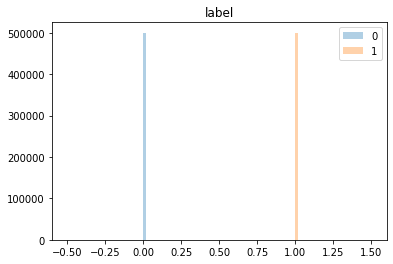

['Skewness = ', 0.0016360005473437266]


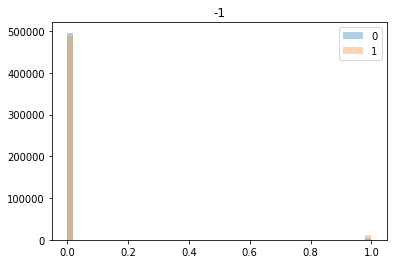

['Skewness = ', 7.705833892631326]


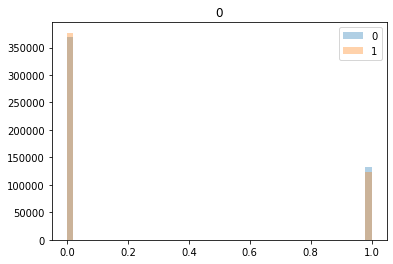

['Skewness = ', 1.1261082852847646]


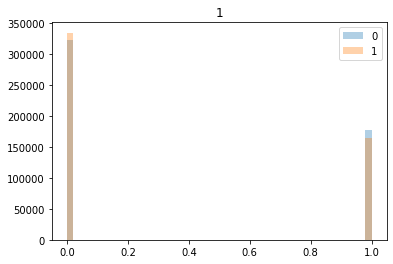

['Skewness = ', 0.6659552305363805]


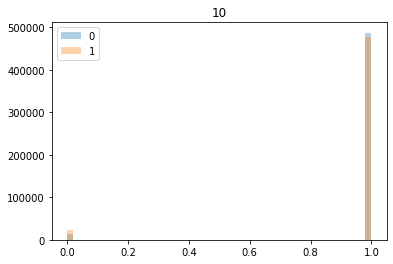

['Skewness = ', -4.87285715962902]


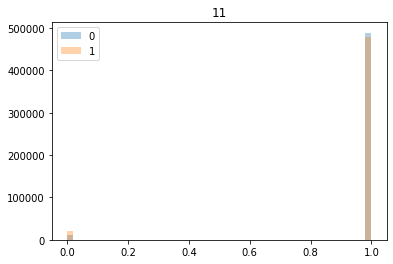

['Skewness = ', -5.270328866125152]


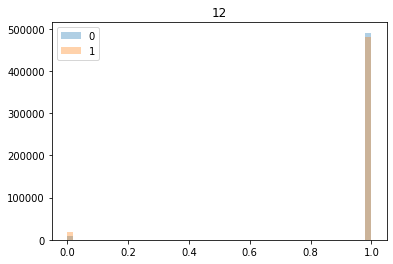

['Skewness = ', -5.591820207058624]


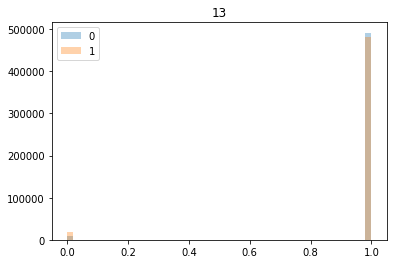

['Skewness = ', -5.822692649113133]


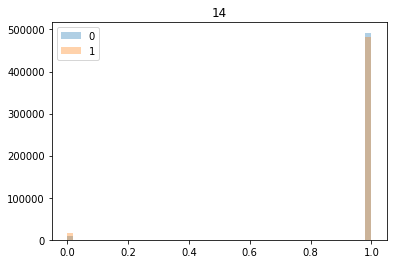

['Skewness = ', -6.025743974857918]


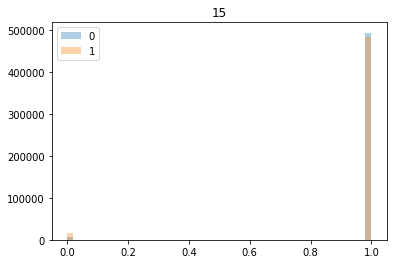

['Skewness = ', -6.220229644522868]


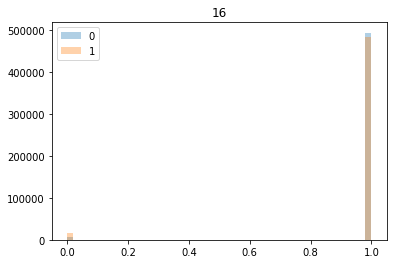

['Skewness = ', -6.444126731245106]


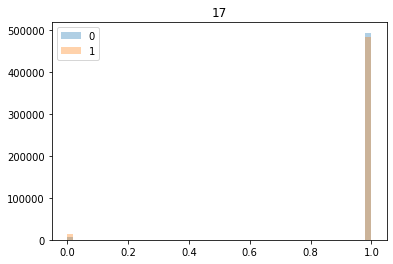

['Skewness = ', -6.699229823951231]


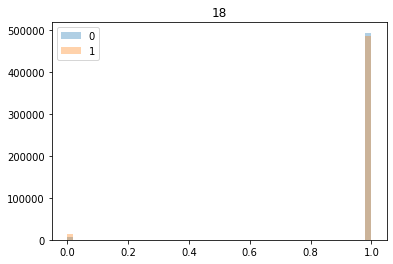

['Skewness = ', -6.948825159432844]


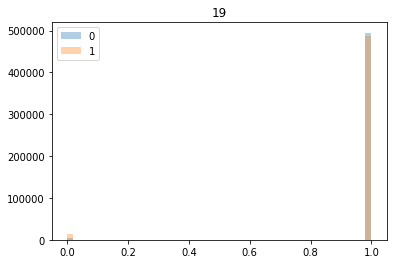

['Skewness = ', -7.167047578552275]


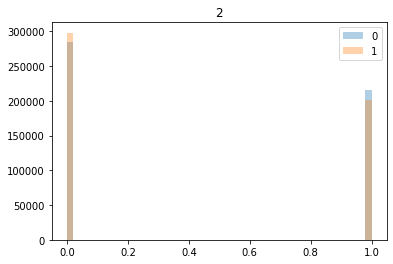

['Skewness = ', 0.33774320231430155]


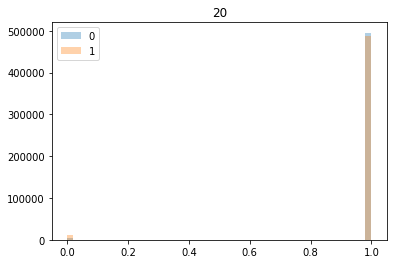

['Skewness = ', -7.325021735967374]


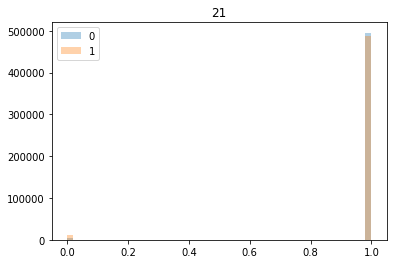

['Skewness = ', -7.414521696123237]


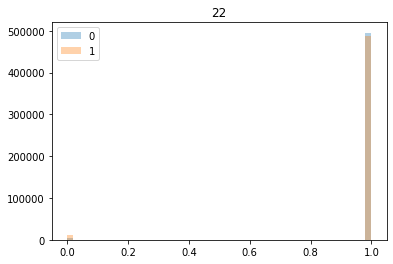

['Skewness = ', -7.364276829052086]


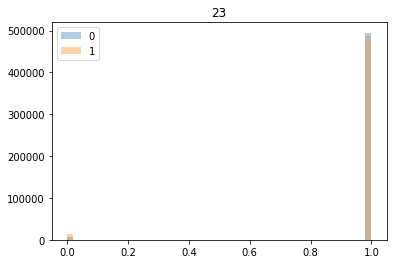

['Skewness = ', -7.135722990219721]


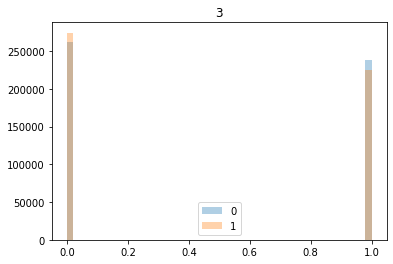

['Skewness = ', 0.1484673923238531]


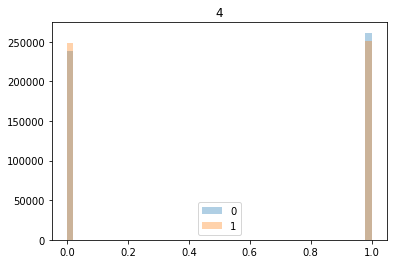

['Skewness = ', -0.05016777537376388]


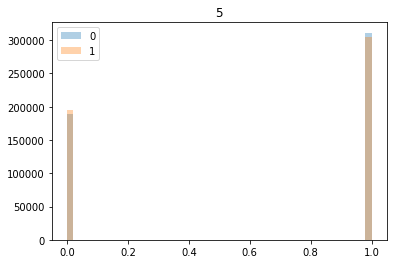

['Skewness = ', -0.47669338318172944]


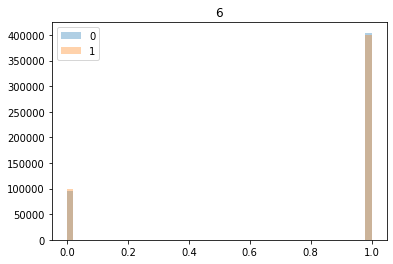

['Skewness = ', -1.5327030782267632]


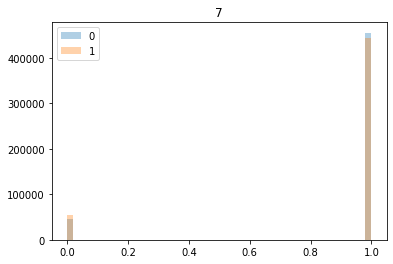

['Skewness = ', -2.648563021107218]


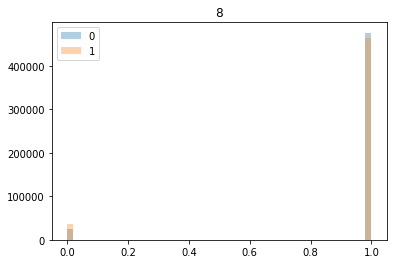

['Skewness = ', -3.6765044745788082]


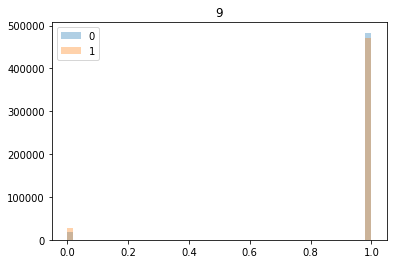

['Skewness = ', -4.3663807865217255]


In [14]:
for i in c_new:
    s0 = df.loc[df['label']==0,i]
    s1 = df.loc[df['label']==1,i]

    plt.hist(s0,bins = 50, label= '0',histtype='bar' ,alpha=0.35)
    plt.hist(s1,bins = 50, label= '1',histtype='bar', alpha=0.35)
    plt.legend(loc='best')
    plt.title(i)
    plt.show()
    print(['Skewness = ' , skew(df[i], axis=0, bias=True)])

In [15]:
corr = df[c_new].corr()

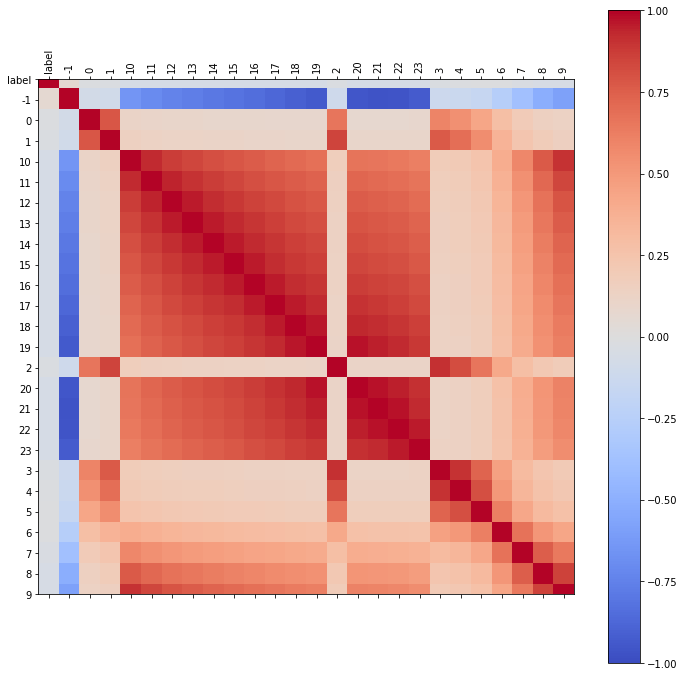

In [18]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(c_new),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(c_new)
ax.set_yticklabels(c_new)
plt.show()